In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES
/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv


# **start upload important libraries**
****

In [2]:
import warnings

warnings.filterwarnings('ignore')
import plotly.express as px 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize =(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

# ***let's download data ***

In [3]:
df = pd.read_csv('/kaggle/input/the-big-dataset-of-ultra-marathon-running/TWO_CENTURIES_OF_UM_RACES.csv')
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


# ** EXPLOTARY DATA ANALYSIS **

In [4]:
df.shape

(7461195, 13)

In [5]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [6]:
df.info 

<bound method DataFrame.info of          Year of event Event dates                                Event name  \
0                 2018  06.01.2018                       Selva Costera (CHI)   
1                 2018  06.01.2018                       Selva Costera (CHI)   
2                 2018  06.01.2018                       Selva Costera (CHI)   
3                 2018  06.01.2018                       Selva Costera (CHI)   
4                 2018  06.01.2018                       Selva Costera (CHI)   
...                ...         ...                                       ...   
7461190           1995  00.00.1995                 La SainteLyon 65 km (FRA)   
7461191           1995  00.00.1995                 La SainteLyon 65 km (FRA)   
7461192           1995  00.00.1995  Szombathely 24 hours running Race  (HUN)   
7461193           1995  00.00.1995  Szombathely 24 hours running Race  (HUN)   
7461194           1995  00.00.1995  Szombathely 24 hours running Race  (HUN)   

       

In [7]:
df.isnull().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

# DATA CLEANING 

In [8]:
df.drop_duplicates(inplace= True)

In [9]:
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461190,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,4:33:20 h,NaN,FRA,NaN,M,NaN,14268.0,1151060
7461191,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,6:05:15 h,NaN,FRA,NaN,F,NaN,10678.0,1073520
7461192,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,241.000 km,*Budapest,HUN,1950.0,M,M40,10042.0,1047373
7461193,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,228.000 km,*Szeged,HUN,1959.0,M,M35,9500.0,380150


<Axes: title={'center': 'No of Events in each country'}, xlabel='Country', ylabel='Count'>

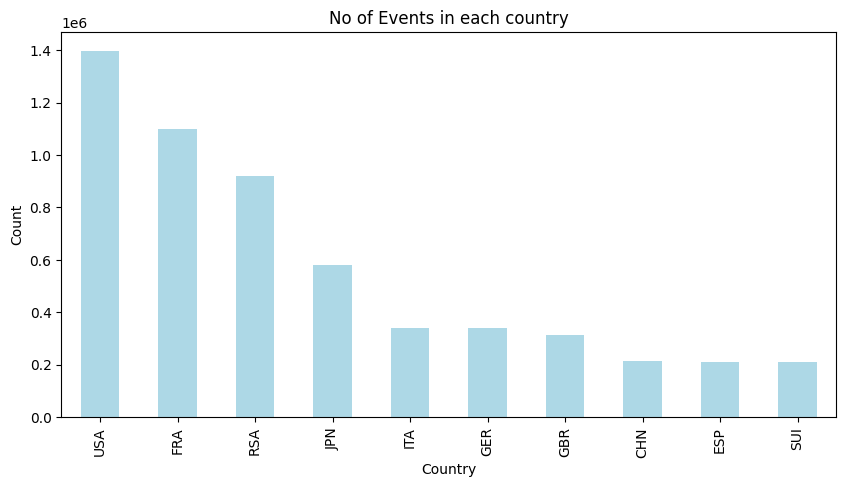

In [10]:
#no of countrys event:
df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0).value_counts().head(10).plot(kind='bar',title='No of Events in each country',ylabel='Count',xlabel='Country',color='lightblue',figsize=(10,5))

# *** data transformation (select only france and prepare for analysis)***

In [11]:
df=df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)=='FRA']
df.shape

(1098143, 13)

In [12]:
df=df[df['Athlete country']=='FRA']
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
3218,2018,18.03.2018,Trail Du Ventoux 46 km (FRA),46km,893,4:00:52 h,CAB Bellegardien,FRA,1975.0,M,M40,11.459,2593
3219,2018,18.03.2018,Trail Du Ventoux 46 km (FRA),46km,893,4:01:05 h,Team Trail Eric Favre,FRA,1979.0,M,M35,11.448,2594
3220,2018,18.03.2018,Trail Du Ventoux 46 km (FRA),46km,893,4:03:26 h,Coureurs Du Monde En I...,FRA,1983.0,M,M23,11.338,2595
3221,2018,18.03.2018,Trail Du Ventoux 46 km (FRA),46km,893,4:04:18 h,Hoka,FRA,1986.0,M,M23,11.298,2596
3222,2018,18.03.2018,Trail Du Ventoux 46 km (FRA),46km,893,4:04:47 h,Oxitis Odlo,FRA,1983.0,M,M23,11.275,2597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460927,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:59:47 h,Cslg Marseille,FRA,NaN,M,NaN,7145.0,1641151
7460929,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,14:28:37 h,NaN,FRA,1944.0,M,M50,6908.0,1049049
7461188,1995,00.00.1995,Les 24 heures de Fleurbaix (FRA),24h,2,232.810 km,NaN,FRA,1958.0,M,M35,9700.0,1069476
7461190,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,4:33:20 h,NaN,FRA,NaN,M,NaN,14268.0,1151060


In [13]:
df.shape

(1040115, 13)

In [14]:
df['Event distance/length'].nunique()

534

In [15]:
df['Event distance/length'].value_counts()

Event distance/length
100km              118044
50km                62802
45km                43105
55km                39441
80km                36887
                    ...  
65.3km                  1
51.8km                  1
81.3km/3Etappen         1
86km/3Etappen           1
91.2km                  1
Name: count, Length: 534, dtype: int64

In [16]:
#keep only most occurs (100km,50km,45km,55km,80km)
df = df[df['Event distance/length'].isin(['100km','50km','45km','55km','80km'])]
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
4110,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:18:07 h,Nice Cote D'Azur Athle...,FRA,1992.0,F,W23,9.431,3484
4111,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:44:43 h,Stadoceste Tarbes,FRA,1969.0,F,W45,8.703,3485
4112,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:17:02 h,PCA - S/L CCA Rouffach,FRA,1980.0,F,W35,7.957,3486
4113,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:26:35 h,Avec - S/L Avec Pays d...,FRA,1951.0,F,W65,7.76,3487
4114,2018,18.03.2018,Championnats de France de 50 km Marche - Homme...,50km,12,4:15:17 h,ANA - S/L SG la Wantzenau,FRA,1996.0,M,MU23,11.752,3488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460922,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:09:41 h,Spiridon Catalan PER,FRA,1940.0,M,M50,8223.0,1048801
7460924,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:25:27 h,Courir Ensemble Sncf,FRA,1942.0,M,M50,8049.0,1065593
7460926,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:59:44 h,NaN,FRA,1941.0,M,M50,7145.0,1074986
7460927,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:59:47 h,Cslg Marseille,FRA,NaN,M,NaN,7145.0,1641151


<Axes: title={'center': 'no of distace'}, xlabel='Event distance/length', ylabel='amount of km'>

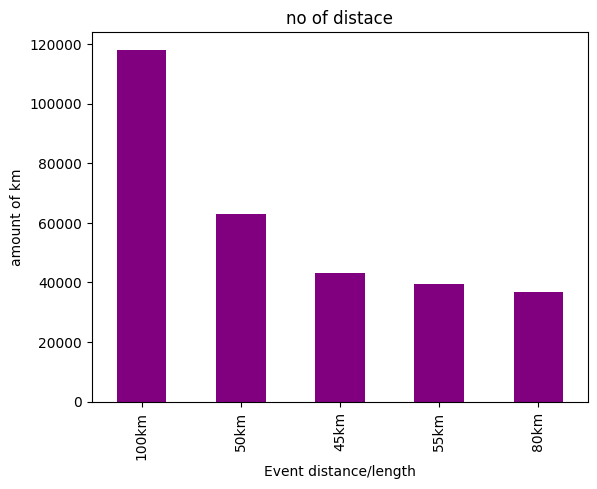

In [17]:
df['Event distance/length'].value_counts().head(10).plot(kind='bar',title='no of distace',xlabel='Event distance/length',ylabel='amount of km',color='purple')

In [18]:
df['Athlete club'].value_counts()

Athlete club
*Paris                     3230
Pass Running               2045
*Millau                     846
*La Reunion                 844
*Toulouse                   778
                           ... 
Casquette Orange              1
Pjap                          1
les Copains du Trail 66       1
YOU CAN Trail                 1
Cslg Marseille                1
Name: count, Length: 53505, dtype: int64

**search for null values**

In [19]:
df['Athlete club'].isnull().sum()

126616

In [20]:
df['Athlete club'].fillna(0)

4110       Nice Cote D'Azur Athle...
4111               Stadoceste Tarbes
4112          PCA - S/L CCA Rouffach
4113       Avec - S/L Avec Pays d...
4114       ANA - S/L SG la Wantzenau
                     ...            
7460922         Spiridon Catalan PER
7460924         Courir Ensemble Sncf
7460926                            0
7460927               Cslg Marseille
7460929                            0
Name: Athlete club, Length: 300279, dtype: object

In [21]:
df['Event name'].value_counts()

Event name
Les 100 km de Millau (FRA)                                        41577
100 km du Périgord Noir, Belves (FRA)                             10403
La 6000D (FRA)                                                     8860
EcoTrail de Paris - Ile de France 45 km (FRA)                      6437
Le Trail de Paris-Ile de France 80 km (FRA)                        5637
                                                                  ...  
Paris - Troyes - 100km Split (FRA)                                    1
Rouen - Paris - 100km Split (FRA)                                     1
100 km de Gentilly - National Championship - 50 km Split (FRA)        1
Championnats Nationaux des 100km Marche - 50km Man (FRA)              1
100 km de Paris (FRA)                                                 1
Name: count, Length: 653, dtype: int64

In [22]:
df.isnull().sum()

Year of event                     0
Event dates                       0
Event name                        0
Event distance/length             0
Event number of finishers         0
Athlete performance               0
Athlete club                 126616
Athlete country                   0
Athlete year of birth         26105
Athlete gender                    2
Athlete age category          26074
Athlete average speed             0
Athlete ID                        0
dtype: int64

In [23]:
df=df.dropna(subset=['Athlete year of birth'])
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
4110,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:18:07 h,Nice Cote D'Azur Athle...,FRA,1992.0,F,W23,9.431,3484
4111,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:44:43 h,Stadoceste Tarbes,FRA,1969.0,F,W45,8.703,3485
4112,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:17:02 h,PCA - S/L CCA Rouffach,FRA,1980.0,F,W35,7.957,3486
4113,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:26:35 h,Avec - S/L Avec Pays d...,FRA,1951.0,F,W65,7.76,3487
4114,2018,18.03.2018,Championnats de France de 50 km Marche - Homme...,50km,12,4:15:17 h,ANA - S/L SG la Wantzenau,FRA,1996.0,M,MU23,11.752,3488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460921,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,11:49:25 h,Villemomble Sports,FRA,1938.0,M,M55,8458.0,18519
7460922,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:09:41 h,Spiridon Catalan PER,FRA,1940.0,M,M50,8223.0,1048801
7460924,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:25:27 h,Courir Ensemble Sncf,FRA,1942.0,M,M50,8049.0,1065593
7460926,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:59:44 h,NaN,FRA,1941.0,M,M50,7145.0,1074986


In [24]:
df.isnull().sum()

Year of event                     0
Event dates                       0
Event name                        0
Event distance/length             0
Event number of finishers         0
Athlete performance               0
Athlete club                 110071
Athlete country                   0
Athlete year of birth             0
Athlete gender                    2
Athlete age category              6
Athlete average speed             0
Athlete ID                        0
dtype: int64

**need to get athlete age **

In [25]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [26]:
df['Athlete year of birth']=df['Athlete year of birth'].astype('int64')
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
4110,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:18:07 h,Nice Cote D'Azur Athle...,FRA,1992,F,W23,9.431,3484
4111,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:44:43 h,Stadoceste Tarbes,FRA,1969,F,W45,8.703,3485
4112,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:17:02 h,PCA - S/L CCA Rouffach,FRA,1980,F,W35,7.957,3486
4113,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:26:35 h,Avec - S/L Avec Pays d...,FRA,1951,F,W65,7.76,3487
4114,2018,18.03.2018,Championnats de France de 50 km Marche - Homme...,50km,12,4:15:17 h,ANA - S/L SG la Wantzenau,FRA,1996,M,MU23,11.752,3488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460921,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,11:49:25 h,Villemomble Sports,FRA,1938,M,M55,8458.0,18519
7460922,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:09:41 h,Spiridon Catalan PER,FRA,1940,M,M50,8223.0,1048801
7460924,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:25:27 h,Courir Ensemble Sncf,FRA,1942,M,M50,8049.0,1065593
7460926,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:59:44 h,NaN,FRA,1941,M,M50,7145.0,1074986


In [27]:
df['Athlete_Age']=df['Year of event']-df['Athlete year of birth']
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
4110,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:18:07 h,Nice Cote D'Azur Athle...,FRA,1992,F,W23,9.431,3484,26
4111,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:44:43 h,Stadoceste Tarbes,FRA,1969,F,W45,8.703,3485,49
4112,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:17:02 h,PCA - S/L CCA Rouffach,FRA,1980,F,W35,7.957,3486,38
4113,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:26:35 h,Avec - S/L Avec Pays d...,FRA,1951,F,W65,7.76,3487,67
4114,2018,18.03.2018,Championnats de France de 50 km Marche - Homme...,50km,12,4:15:17 h,ANA - S/L SG la Wantzenau,FRA,1996,M,MU23,11.752,3488,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460921,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,11:49:25 h,Villemomble Sports,FRA,1938,M,M55,8458.0,18519,57
7460922,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:09:41 h,Spiridon Catalan PER,FRA,1940,M,M50,8223.0,1048801,55
7460924,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:25:27 h,Courir Ensemble Sncf,FRA,1942,M,M50,8049.0,1065593,53
7460926,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:59:44 h,NaN,FRA,1941,M,M50,7145.0,1074986,54


In [28]:
# remove h from athlete performance 
df['Athlete performance'] = df['Athlete performance'].str.split(" ").str.get(0)
df


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
4110,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:18:07,Nice Cote D'Azur Athle...,FRA,1992,F,W23,9.431,3484,26
4111,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:44:43,Stadoceste Tarbes,FRA,1969,F,W45,8.703,3485,49
4112,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:17:02,PCA - S/L CCA Rouffach,FRA,1980,F,W35,7.957,3486,38
4113,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:26:35,Avec - S/L Avec Pays d...,FRA,1951,F,W65,7.76,3487,67
4114,2018,18.03.2018,Championnats de France de 50 km Marche - Homme...,50km,12,4:15:17,ANA - S/L SG la Wantzenau,FRA,1996,M,MU23,11.752,3488,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460921,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,11:49:25,Villemomble Sports,FRA,1938,M,M55,8458.0,18519,57
7460922,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:09:41,Spiridon Catalan PER,FRA,1940,M,M50,8223.0,1048801,55
7460924,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,12:25:27,Courir Ensemble Sncf,FRA,1942,M,M50,8049.0,1065593,53
7460926,1995,29.01.1995,100 km de Rognonas (FRA),100km,94,13:59:44,NaN,FRA,1941,M,M50,7145.0,1074986,54


In [29]:
df=df.drop_duplicates()

In [30]:
df=df.reset_index()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274174 entries, 0 to 274173
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   index                      274174 non-null  int64 
 1   Year of event              274174 non-null  int64 
 2   Event dates                274174 non-null  object
 3   Event name                 274174 non-null  object
 4   Event distance/length      274174 non-null  object
 5   Event number of finishers  274174 non-null  int64 
 6   Athlete performance        274174 non-null  object
 7   Athlete club               164103 non-null  object
 8   Athlete country            274174 non-null  object
 9   Athlete year of birth      274174 non-null  int64 
 10  Athlete gender             274172 non-null  object
 11  Athlete age category       274168 non-null  object
 12  Athlete average speed      274174 non-null  object
 13  Athlete ID                 274174 non-null  

In [32]:
df['Athlete average speed']=df['Athlete average speed'].astype('float64')

In [33]:
df = df[df['Athlete average speed'] < 25]
df

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
0,4110,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:18:07,Nice Cote D'Azur Athle...,FRA,1992,F,W23,9.431,3484,26
1,4111,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:44:43,Stadoceste Tarbes,FRA,1969,F,W45,8.703,3485,49
2,4112,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:17:02,PCA - S/L CCA Rouffach,FRA,1980,F,W35,7.957,3486,38
3,4113,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:26:35,Avec - S/L Avec Pays d...,FRA,1951,F,W65,7.760,3487,67
4,4114,2018,18.03.2018,Championnats de France de 50 km Marche - Homme...,50km,12,4:15:17,ANA - S/L SG la Wantzenau,FRA,1996,M,MU23,11.752,3488,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237558,6820070,2015,10.10.2015,100 km de la Somme (FRA),100km,172,13:43:04,Les Kekes Du Bocage,FRA,1948,M,M65,7.290,1519979,67
237559,6820071,2015,10.10.2015,100 km de la Somme (FRA),100km,172,13:55:24,NaN,FRA,1967,M,M45,7.182,22753,48
237560,6820072,2015,10.10.2015,100 km de la Somme (FRA),100km,172,14:04:41,NaN,FRA,1984,M,M23,7.103,22337,31
237561,6820073,2015,10.10.2015,100 km de la Somme (FRA),100km,172,14:06:26,NaN,FRA,1983,M,M23,7.089,354243,32


In [34]:
df=df.drop(['Athlete club','Athlete year of birth'],axis=1)

**search for null values **

In [35]:
df.info

<bound method DataFrame.info of           index  Year of event Event dates  \
0          4110           2018  18.03.2018   
1          4111           2018  18.03.2018   
2          4112           2018  18.03.2018   
3          4113           2018  18.03.2018   
4          4114           2018  18.03.2018   
...         ...            ...         ...   
237558  6820070           2015  10.10.2015   
237559  6820071           2015  10.10.2015   
237560  6820072           2015  10.10.2015   
237561  6820073           2015  10.10.2015   
237562  6820074           2015  10.10.2015   

                                               Event name  \
0       Championnats de France de 50 km Marche - Femme...   
1       Championnats de France de 50 km Marche - Femme...   
2       Championnats de France de 50 km Marche - Femme...   
3       Championnats de France de 50 km Marche - Femme...   
4       Championnats de France de 50 km Marche - Homme...   
...                                              

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,237563.0,3.808498e+06,1.881556e+06,4110.000,2267512.50,4089081.000,5375134.500,6820074.000
Year of event,237563.0,2.013231e+03,6.227805e+00,1996.000,2010.00,2014.000,2018.000,2022.000
Event number of finishers,237563.0,5.998645e+02,5.568536e+02,1.000,159.00,366.000,1001.000,2446.000
Athlete average speed,237563.0,7.533836e+00,1.889669e+00,1.106,6.22,7.449,8.728,16.379
Athlete ID,237563.0,5.438013e+05,4.405587e+05,14.000,164512.00,417560.000,977106.000,1519979.000
Athlete_Age,237563.0,4.365765e+01,9.666637e+00,13.000,37.00,44.000,50.000,94.000


# data after preparation & cleaning

In [37]:
# data after preparation & cleaning 
df

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
0,4110,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:18:07,FRA,F,W23,9.431,3484,26
1,4111,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,5:44:43,FRA,F,W45,8.703,3485,49
2,4112,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:17:02,FRA,F,W35,7.957,3486,38
3,4113,2018,18.03.2018,Championnats de France de 50 km Marche - Femme...,50km,4,6:26:35,FRA,F,W65,7.760,3487,67
4,4114,2018,18.03.2018,Championnats de France de 50 km Marche - Homme...,50km,12,4:15:17,FRA,M,MU23,11.752,3488,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237558,6820070,2015,10.10.2015,100 km de la Somme (FRA),100km,172,13:43:04,FRA,M,M65,7.290,1519979,67
237559,6820071,2015,10.10.2015,100 km de la Somme (FRA),100km,172,13:55:24,FRA,M,M45,7.182,22753,48
237560,6820072,2015,10.10.2015,100 km de la Somme (FRA),100km,172,14:04:41,FRA,M,M23,7.103,22337,31
237561,6820073,2015,10.10.2015,100 km de la Somme (FRA),100km,172,14:06:26,FRA,M,M23,7.089,354243,32


# VISUALIZING THE DATA 

<Axes: title={'center': 'Number of Athlete'}, xlabel='Event Name', ylabel='NO. of Athlete '>

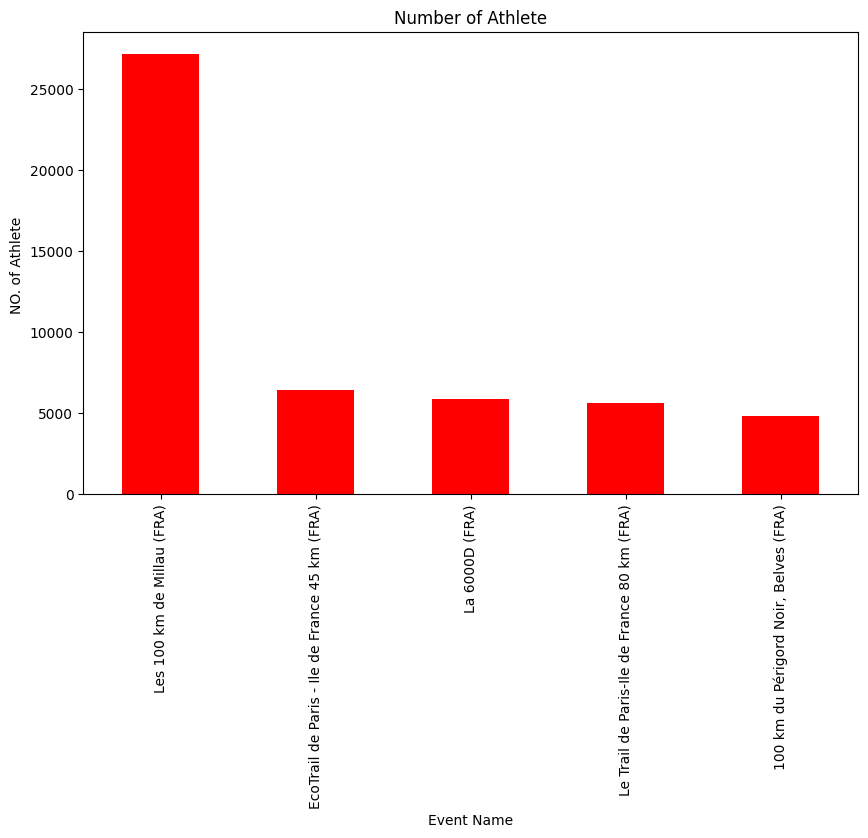

In [38]:
# number of alhlete participated in each event
df['Event name'].value_counts().head().plot(kind='bar',title='Number of Athlete',xlabel='Event Name',ylabel='NO. of Athlete ',
                                           figsize=(10,6),color='red')

# **The Number of Race in 50 km,100 km,24h and 12h category By gender¶**

Text(0.5, 1.0, 'The Number of Race in 100km,50km,45km,55km,80km category By gender')

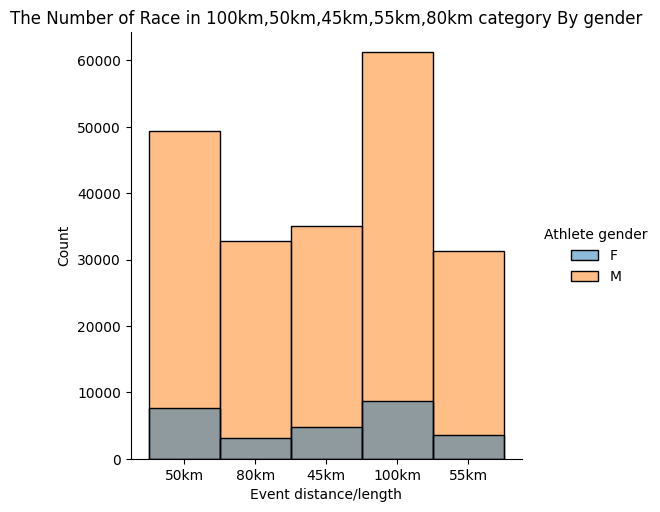

In [39]:
#Athelete participated gender wise in each Event distance/length.
sns.displot(data=df,kind='hist',x='Event distance/length',hue='Athlete gender',binwidth=5)
plt.title('The Number of Race in 100km,50km,45km,55km,80km category By gender')

**shows how many times each unique combination of Event distance/length and Athlete gender appears in the DataFrame.**

In [40]:
race_by_gender=pd.crosstab(index=df['Event distance/length'],columns=df['Athlete gender'])
race_by_gender

Athlete gender,F,M
Event distance/length,,
100km,8675,61211
45km,4853,35005
50km,7670,49369
55km,3515,31356
80km,3076,32833


Text(0.5, 1.0, 'Distributions of Athlete age')

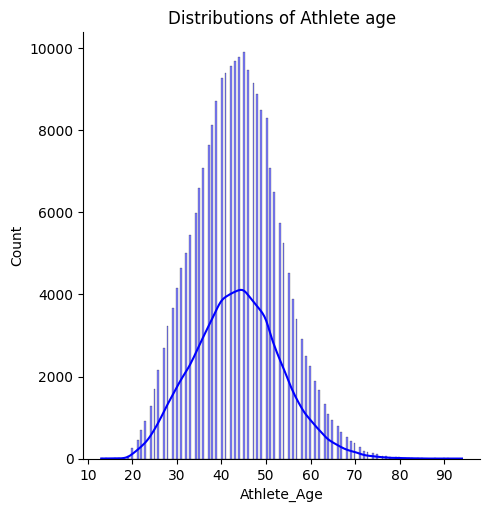

In [41]:
sns.displot(data=df,x='Athlete_Age',kind='hist',color='blue',kde='True')
plt.title("Distributions of Athlete age")

Text(0.5, 1.0, 'Distributions of Athlete average speed')

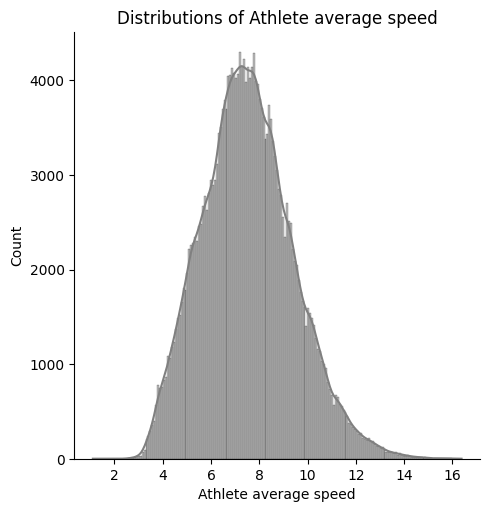

In [42]:
sns.displot(data=df,x='Athlete average speed',color='grey',kde=True)
plt.title("Distributions of Athlete average speed")

In [43]:
age_vs_speed=df.groupby(['Athlete age category'])['Athlete average speed'].agg(['mean','count']).sort_values(by='mean',ascending=False).query('count>20')
age_vs_speed

,mean,count
Athlete age category,,
M40,7.754412,42429
M35,7.735701,35892
M45,7.709695,38785
M23,7.561194,40433
M50,7.529432,26129
MU23,7.353621,1995
M55,7.311226,13764
W40,7.187726,5682
M60,7.120493,6454


# **Average speed vs Age**

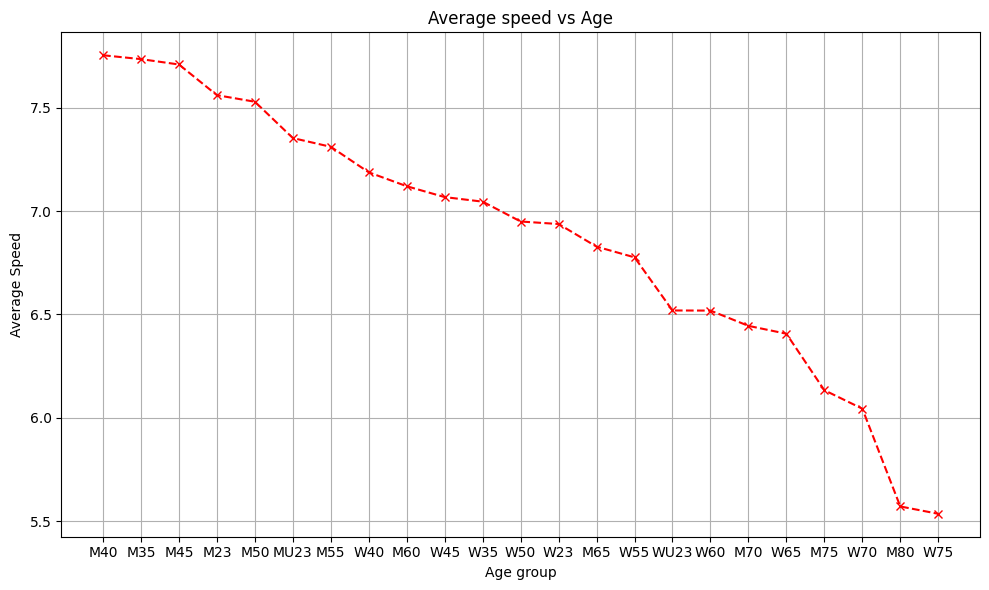

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(age_vs_speed.index, age_vs_speed['mean'], marker='x', color='r', linestyle='--')
plt.xlabel('Age group')
plt.ylabel('Average Speed')
plt.title('Average speed vs Age')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
distance_gender=df.groupby(['Event distance/length','Athlete gender'])['Athlete average speed'].agg(['mean','count']).sort_values(by='mean',ascending=False)
data=distance_gender.reset_index()
data

,Event distance/length,Athlete gender,mean,count
0,100km,M,8.071335,61211
1,50km,M,7.894738,49369
2,45km,M,7.585516,35005
3,100km,F,7.346126,8675
4,50km,F,7.219708,7670
5,55km,M,6.981033,31356
6,80km,M,6.917665,32833
7,45km,F,6.909939,4853
8,80km,F,6.446731,3076
9,55km,F,6.238389,3515


# **Athlete average speed by Event Distance and Gender**

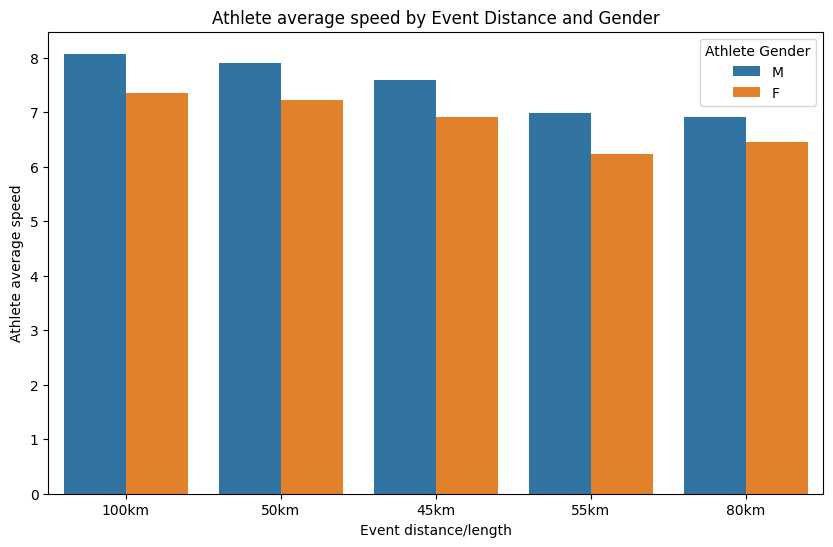

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Event distance/length', y='mean', hue='Athlete gender', data=data)
plt.xlabel('Event distance/length')
plt.ylabel('Athlete average speed')
plt.title('Athlete average speed by Event Distance and Gender')
plt.legend(title='Athlete Gender')
plt.show()

In [47]:
distance = df.groupby(['Event distance/length','Athlete gender']).agg({'Athlete gender': 'count', 'Athlete average speed': ['mean', 'count']})
distance

Athlete gender Athlete average speed  \
                                              count                  mean   
Event distance/length Athlete gender                                        
100km                 F                        8675              7.346126   
                      M                       61211              8.071335   
45km                  F                        4853              6.909939   
                      M                       35005              7.585516   
50km                  F                        7670              7.219708   
                      M                       49369              7.894738   
55km                  F                        3515              6.238389   
                      M                       31356              6.981033   
80km                  F                        3076              6.446731   
                      M                       32833              6.917665   

                                             
                                      count  
Event distance/length Athlete gender         
100km                 F                8675  
                      M               61211  
45km                  F                4853  
                      M               35005  
50km                  F                7670  
                      M               49369  
55km                  F                3515  
                      M               31356  
80km                  F                3076  
                      M               32833

# the relationship between the length of the race and athlethe average speed

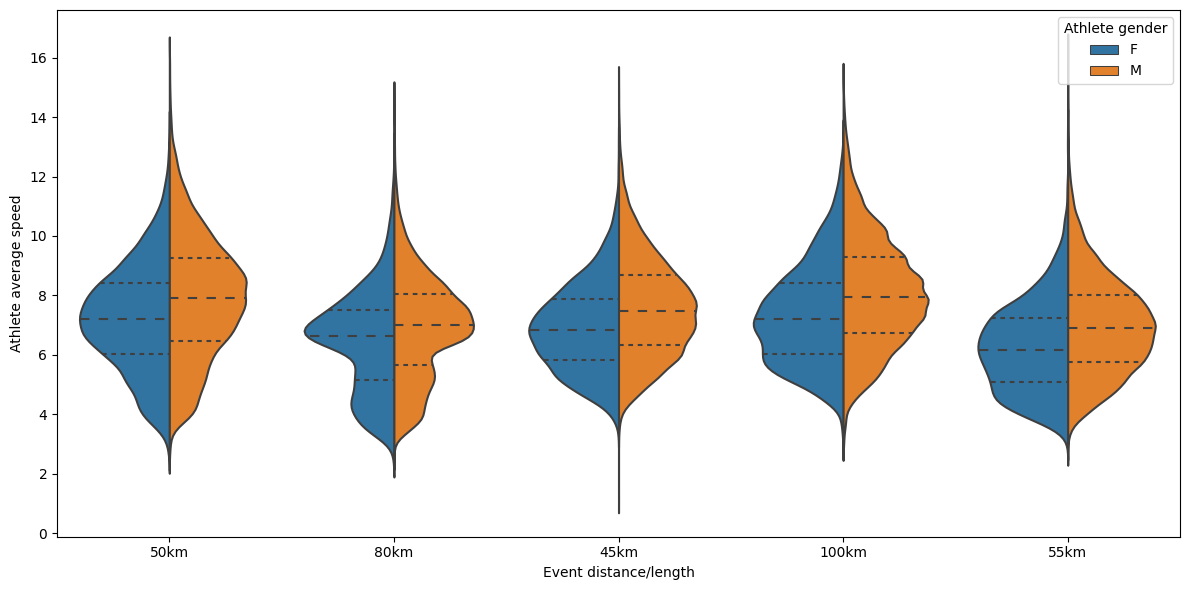

In [48]:
# the relationship between the length of the race and athlethe average speed
plt.figure(figsize=(12, 6))
sns.violinplot(data =df, x = 'Event distance/length', y='Athlete average speed', hue = 'Athlete gender', split = True, inner='quartz')
plt.tight_layout()

In [49]:
#this will covert event date to fix format will will be easily Accessible
df['Event dates']=pd.to_datetime(df['Event dates'],errors='coerce')


In [50]:
df['Athlete performance']=pd.to_datetime(df['Athlete performance'],errors='coerce')

<Axes: xlabel='Event distance/length', ylabel='Athlete performance'>

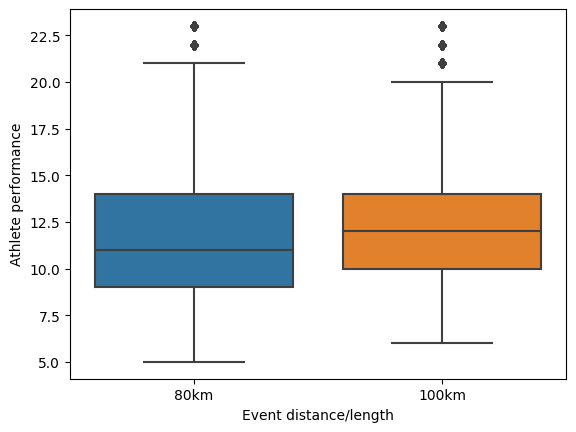

In [51]:
filtered_df = df[(df['Event distance/length'] == '80km') | (df['Event distance/length'] == '100km')]
sns.boxplot(y=filtered_df['Athlete performance'].dt.hour,x=filtered_df['Event distance/length'])

In [52]:
filtered_df

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
14,7749,2018,NaT,EcoTrail de Paris - Ile de France 80 km (FRA),80km,1695,2024-09-22 06:00:59,FRA,M,M35,13.297,7096,38
15,7750,2018,NaT,EcoTrail de Paris - Ile de France 80 km (FRA),80km,1695,2024-09-22 06:05:07,FRA,M,M40,13.146,7097,42
16,7753,2018,NaT,EcoTrail de Paris - Ile de France 80 km (FRA),80km,1695,2024-09-22 06:16:48,FRA,M,M35,12.739,7100,35
17,7754,2018,NaT,EcoTrail de Paris - Ile de France 80 km (FRA),80km,1695,2024-09-22 06:29:24,FRA,M,M35,12.327,7101,38
18,7755,2018,NaT,EcoTrail de Paris - Ile de France 80 km (FRA),80km,1695,2024-09-22 06:42:30,FRA,M,M23,11.925,7102,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237558,6820070,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 13:43:04,FRA,M,M65,7.290,1519979,67
237559,6820071,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 13:55:24,FRA,M,M45,7.182,22753,48
237560,6820072,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 14:04:41,FRA,M,M23,7.103,22337,31
237561,6820073,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 14:06:26,FRA,M,M23,7.089,354243,32


# **Time in hours vs Speed**

Text(0.5, 1.0, 'Time vs Speed')

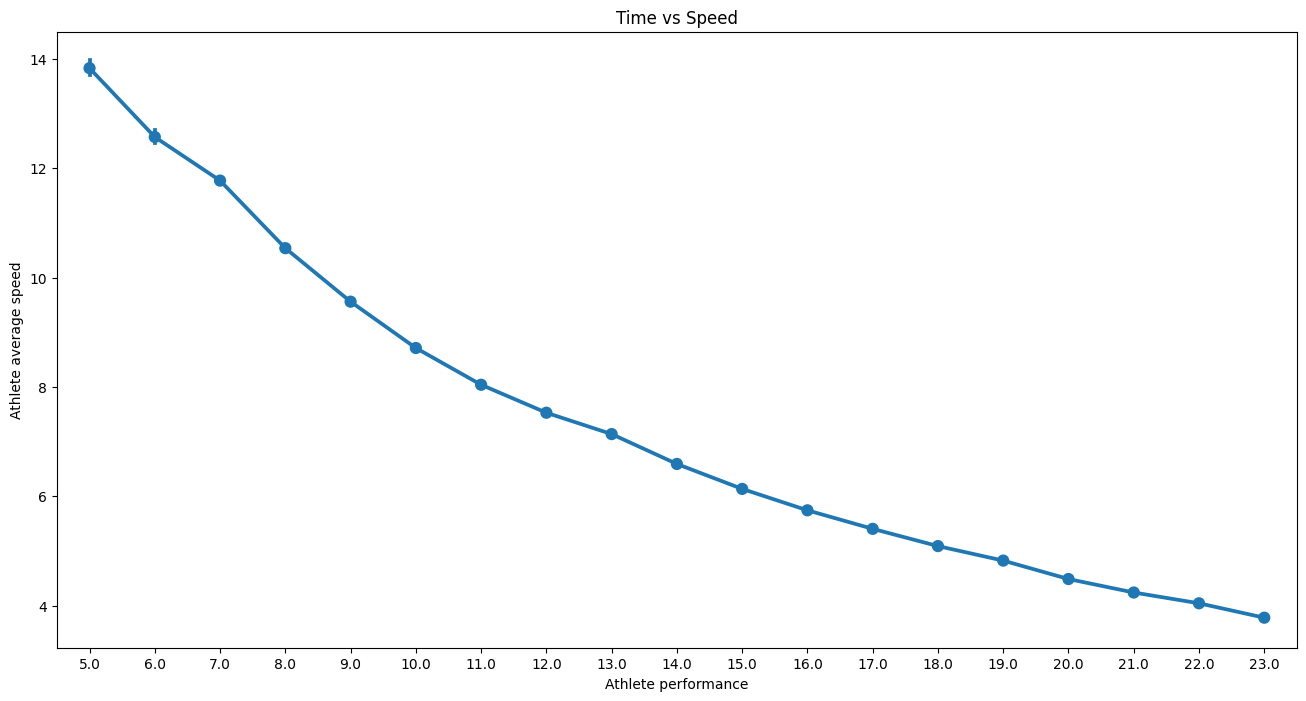

In [53]:
plt.figure(figsize=(16,8))
sns.pointplot(data=filtered_df['Event distance/length'],x=filtered_df['Athlete performance'].dt.hour,y=df['Athlete average speed'],estimator='mean')
plt.title('Time vs Speed')

In [54]:
df['Athlete_performance_in_hours']=df['Athlete performance'].dt.hour+(df['Athlete performance'].dt.minute/60)

In [55]:
df

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age,Athlete_performance_in_hours
0,4110,2018,2018-03-18,Championnats de France de 50 km Marche - Femme...,50km,4,2024-09-22 05:18:07,FRA,F,W23,9.431,3484,26,5.300000
1,4111,2018,2018-03-18,Championnats de France de 50 km Marche - Femme...,50km,4,2024-09-22 05:44:43,FRA,F,W45,8.703,3485,49,5.733333
2,4112,2018,2018-03-18,Championnats de France de 50 km Marche - Femme...,50km,4,2024-09-22 06:17:02,FRA,F,W35,7.957,3486,38,6.283333
3,4113,2018,2018-03-18,Championnats de France de 50 km Marche - Femme...,50km,4,2024-09-22 06:26:35,FRA,F,W65,7.760,3487,67,6.433333
4,4114,2018,2018-03-18,Championnats de France de 50 km Marche - Homme...,50km,12,2024-09-22 04:15:17,FRA,M,MU23,11.752,3488,22,4.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237558,6820070,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 13:43:04,FRA,M,M65,7.290,1519979,67,13.716667
237559,6820071,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 13:55:24,FRA,M,M45,7.182,22753,48,13.916667
237560,6820072,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 14:04:41,FRA,M,M23,7.103,22337,31,14.066667
237561,6820073,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 14:06:26,FRA,M,M23,7.089,354243,32,14.100000


In [56]:
events_by_hours=df.groupby('Event name')['Athlete_performance_in_hours'].agg(['mean','count','min','max']).query('count>20')
events_by_hours

,mean,count,min,max
Event name,,,,
"100 km Marche St-Thibault-des-Vignes, Champ. Nationaux (FRA)",13.053788,22,8.833333,22.983333
100 km Rimaucourt (FRA),11.124691,54,7.616667,14.766667
100 km Ultra Trail du Vendée (FRA),13.318845,153,9.350000,16.950000
100 km de Bretagne (FRA),11.404478,67,6.766667,15.233333
100 km de Chiché (FRA),11.451465,182,7.600000,15.750000
...,...,...,...,...
Volvic Volcanic Expérience - Trail Terra Volcana (FRA),11.642574,303,7.366667,16.133333
X Trail Corrèze Dordogne - 45km (FRA),6.300844,79,4.516667,9.116667
X Trail Corrèze Dordogne - 80km (FRA),12.197531,108,8.316667,15.816667


# **Event name that has most performance time in hours**

In [57]:
most_performance_time=events_by_hours.sort_values(by='mean',ascending=False)
most_performance_time

,mean,count,min,max
Event name,,,,
La Montagn'Hard 100 km (FRA),21.687619,35,17.216667,23.916667
Le Verdon Challenge Ultrail (FRA),20.565104,64,15.633333,23.916667
Verdon Canyon Challenge 100 km (FRA),20.340286,175,12.750000,23.983333
l'UltrAriège 100km (FRA),20.125353,236,13.233333,23.966667
80km du Mont-Blanc (FRA),19.413154,1191,9.750000,23.983333
...,...,...,...,...
Les 50 km du Loire-Béconnais (FRA),4.648507,67,3.600000,7.016667
Trail Extreme Lillois 45km (FRA),4.620448,119,3.250000,6.266667
Trail de L'Hyrôme (FRA),4.613627,170,3.316667,6.300000


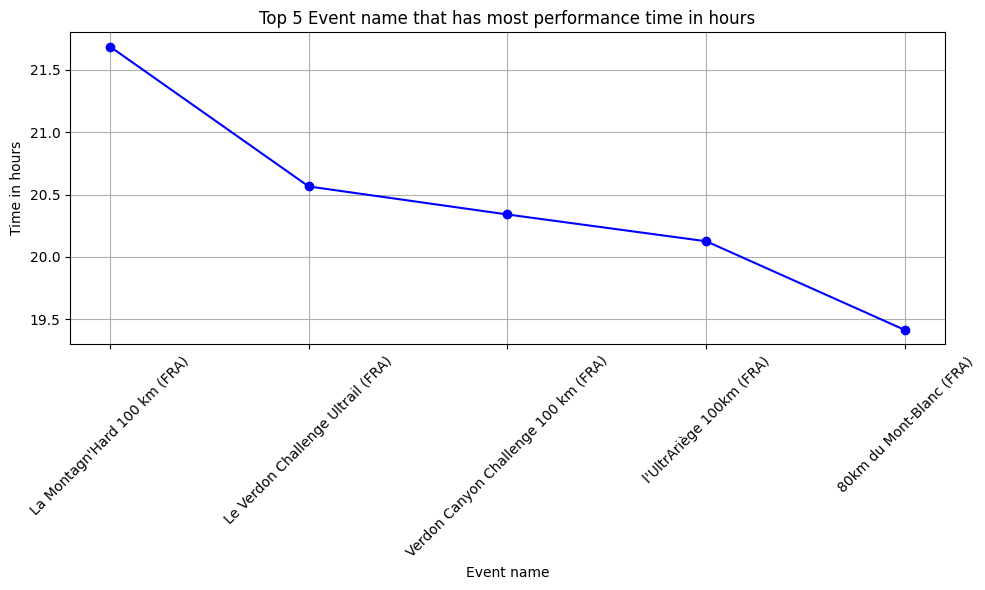

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(most_performance_time.head().index, most_performance_time.head()['mean'], marker='o', color='b', linestyle='-')
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.title('Top 5 Event name that has most performance time in hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Each Event with fastest Finish¶**

In [59]:
fastest_Finish=events_by_hours.sort_values(by='min',ascending=True)
fastest_Finish

,mean,count,min,max
Event name,,,,
Trail De L'Ile D'Yeu 45 km (FRA),4.870975,1207,2.933333,7.033333
EcoTrail de Paris - Ile de France 45 km (FRA),5.414706,6426,2.983333,9.350000
Trail des Cerfs (FRA),5.158867,718,3.066667,6.850000
Les 50 km de la Côte des Légendes (FRA),4.841861,385,3.083333,7.533333
"50 km du Périgord Noir, Belves (FRA)",6.138158,2622,3.100000,10.450000
...,...,...,...,...
Le Raid 97.4 (FRA),19.176096,76,13.016667,23.900000
l'UltrAriège 100km (FRA),20.125353,236,13.233333,23.966667
L'Ultra Techni Trail de Tiranges 100 km (FRA),18.741379,29,14.033333,22.766667


# **Top 5 Event with fastest Finish**

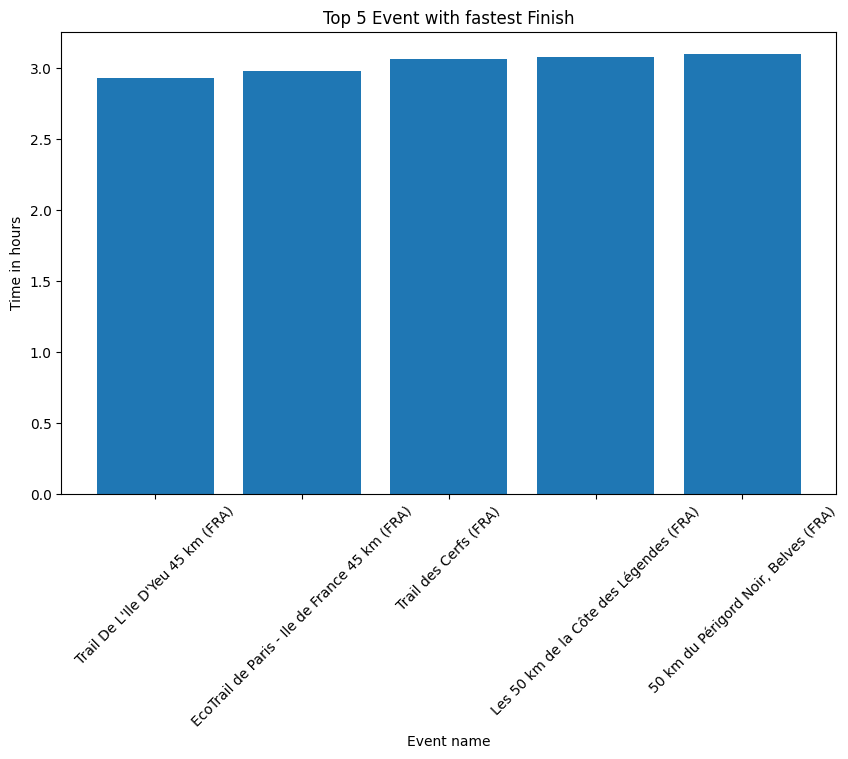

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(fastest_Finish.head().index, fastest_Finish.head()['min'])
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.title('Top 5 Event with fastest Finish')
plt.xticks(rotation=45)
plt.show()

# **Each Event with Slowest Finish**

In [61]:
Slowest_Finish=events_by_hours.sort_values(by='max',ascending=False)
Slowest_Finish

,mean,count,min,max
Event name,,,,
Verdon Canyon Challenge 100 km (FRA),20.340286,175,12.750000,23.983333
80km du Mont-Blanc (FRA),19.413154,1191,9.750000,23.983333
Challenge Héro Drôme Et Nature 100 km (FRA),18.355729,224,12.016667,23.983333
Grand Raid des Pyrénées - Tour des Lacs (FRA),18.350356,937,10.250000,23.983333
Grand Raid des Pyrénées 80 km (FRA),17.346461,3325,9.400000,23.983333
...,...,...,...,...
Course Nature de la Vie - Trail Cougnaud (FRA),4.945960,66,3.816667,5.883333
Championnats de France des 50km Marche (FRA),4.961368,173,3.883333,5.850000
Championnats de France des 50km Marche (FRA),4.897917,32,3.616667,5.783333


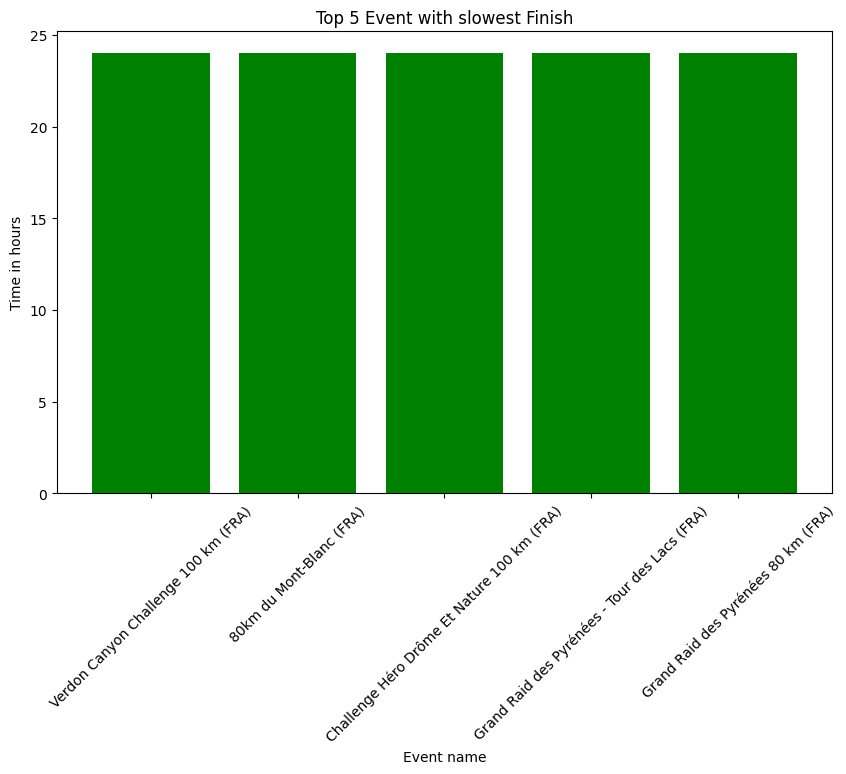

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(Slowest_Finish.head().index, Slowest_Finish.head()['max'],color='green')
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.title('Top 5 Event with slowest Finish')
plt.xticks(rotation=45)
plt.show()

# **Does season has effect in Athlete performance**

In [63]:
df['seasons']=df['Event dates'].dt.month.apply(lambda x: 'winter' if x > 11 else 'fall' if x > 8 else 'summer' if x > 3 else 'spring' if x > 2 else 'winter')
df

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age,Athlete_performance_in_hours,seasons
0,4110,2018,2018-03-18,Championnats de France de 50 km Marche - Femme...,50km,4,2024-09-22 05:18:07,FRA,F,W23,9.431,3484,26,5.300000,spring
1,4111,2018,2018-03-18,Championnats de France de 50 km Marche - Femme...,50km,4,2024-09-22 05:44:43,FRA,F,W45,8.703,3485,49,5.733333,spring
2,4112,2018,2018-03-18,Championnats de France de 50 km Marche - Femme...,50km,4,2024-09-22 06:17:02,FRA,F,W35,7.957,3486,38,6.283333,spring
3,4113,2018,2018-03-18,Championnats de France de 50 km Marche - Femme...,50km,4,2024-09-22 06:26:35,FRA,F,W65,7.760,3487,67,6.433333,spring
4,4114,2018,2018-03-18,Championnats de France de 50 km Marche - Homme...,50km,12,2024-09-22 04:15:17,FRA,M,MU23,11.752,3488,22,4.250000,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237558,6820070,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 13:43:04,FRA,M,M65,7.290,1519979,67,13.716667,fall
237559,6820071,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 13:55:24,FRA,M,M45,7.182,22753,48,13.916667,fall
237560,6820072,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 14:04:41,FRA,M,M23,7.103,22337,31,14.066667,fall
237561,6820073,2015,2015-10-10,100 km de la Somme (FRA),100km,172,2024-09-22 14:06:26,FRA,M,M23,7.089,354243,32,14.100000,fall


# **Season wise participation**

In [64]:
season_count=df.seasons.value_counts()
season_count

seasons
summer    94239
winter    78357
fall      40896
spring    24071
Name: count, dtype: int64

In [65]:
px.pie(names=season_count.index,values=season_count.values,hole=.6)

# **Comparing the average speed and participation of Athletes by season and gender¶**

In [66]:
#comparing the average speed by season and gender
Season_race = df.groupby(['seasons','Athlete gender']).agg({'Athlete gender': 'count', 'Athlete average speed': ['mean', 'count']})
Season_race

Athlete gender Athlete average speed       
                                count                  mean  count
seasons Athlete gender                                            
fall    F                        4678              6.975661   4678
        M                       36218              7.608712  36218
spring  F                        3091              7.579019   3091
        M                       20980              8.161066  20980
summer  F                       10881              6.927857  10881
        M                       83358              7.581375  83358
winter  F                        9139              6.888491   9139
        M                       69218              7.463464  69218

In [67]:
Season_race = df.groupby('seasons')['Athlete average speed'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
Season_race

,mean,count
seasons,,
spring,8.086324,24071
fall,7.536299,40896
summer,7.505918,94239
winter,7.396403,78357


# **Effect of season on Athlete average speed**

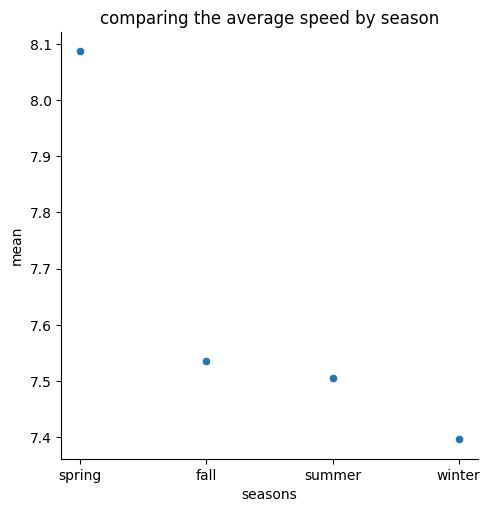

In [68]:
sns.relplot(data = Season_race , x = 'seasons' , y = 'mean',kind = 'scatter' )
plt.title('comparing the average speed by season')
plt.show()